## 1. Import and warehouse data:
### • Import all the given datasets. Explore shape and size.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [2]:
# Import all the given datasets. Explore shape and size

df_1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df_2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

print ("Dataset 1 Rows     : " ,df_1.shape[0])
print ("Dataset 1 Columns  : " ,df_1.shape[1])

print ("Dataset 2 Rows     : " ,df_2.shape[0])
print ("Dataset 2 Columns  : " ,df_2.shape[1])

Dataset 1 Rows     :  7043
Dataset 1 Columns  :  10
Dataset 2 Rows     :  7043
Dataset 2 Columns  :  11


### • Merge all datasets onto one and explore final shape and size.

In [3]:
# Merging the datasets

df = pd.concat([df_1, df_2], axis=1)

# Exploring the Dataet

print('Dataset Infomarion')
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

print(df.gender.unique())
print(df.SeniorCitizen.unique())
print(df.Partner.unique())
print(df.Dependents.unique())
print(df.tenure.unique())
print(df.PhoneService.unique())
print(df.MultipleLines.unique())
print(df.InternetService.unique())
print(df.OnlineSecurity.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())
print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())
print(df.Contract.unique())
print(df.PaperlessBilling.unique())
print(df.PaymentMethod.unique())
print(df.MonthlyCharges.unique())
print(df.TotalCharges.unique())
print(df.Churn.unique())

# Getting Information for the next step 

df.info()

Dataset Infomarion
Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64
['Female' 'Male']
[0 1]
['Yes' 

## 2. Data cleansing: 
### • Missing value treatment
### • Convert categorical attributes to continuous using relevant functional knowledge

In [4]:
# Convert categorical attributes to continuous using relevant functional knowledge
# Missing value treatment

df = df.replace(['-'],0) 

df[['Sex']] = df[['gender']].replace(['Female','Male'],('0','1'));
df[['Partner_']] = df[['Partner']].replace(['Yes','No'],('1','0'));
df[['Dependents_']] = df[['Dependents']].replace(['Yes','No'],('1','0'));
df[['Phone_Service']] = df[['PhoneService']].replace(['Yes','No'],('1','0'));
df[['Multiple_Lines']] = df[['MultipleLines']].replace(['Yes','No','No phone service'],('1','0','0'));
df[['Internet_Service']] = df[['InternetService']].replace(['DSL','No','Fiber optic'],('1','0','2'));
df[['Online_Security']] = df[['OnlineSecurity']].replace(['Yes','No','No internet service'],('1','0','0'));
df[['Online_Backup']] = df[['OnlineBackup']].replace(['Yes','No','No internet service'],('1','0','0'));
df[['Device_Protection']] = df[['DeviceProtection']].replace(['Yes','No','No internet service'],('1','0','0'));
df[['Tech_Support']] = df[['TechSupport']].replace(['Yes','No','No internet service'],('1','0','0'));
df[['Streaming_TV']] = df[['StreamingTV']].replace(['Yes','No','No internet service'],('1','0','0'));
df[['Streaming_Movies']] = df[['StreamingMovies']].replace(['Yes','No','No internet service'],('1','0','0'));
df[['Contract_']] = df[['Contract']].replace(['Month-to-month','One year','Two year'],('0','1','2'));
df[['Paperless_Billing']] = df[['PaperlessBilling']].replace(['Yes','No'],('1','0'));
df[['Payment_Method']] = df[['PaymentMethod']].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],('1','2','3','4'));
df[['Churn_']] = df[['Churn']].replace(['Yes','No'],('1','0'));

df['Total_Charges'] = pd.factorize(df.TotalCharges)[0]

print(df.isna().sum())
print(df.info())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
Sex                  0
Partner_             0
Dependents_          0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract_            0
Paperless_Billing    0
Payment_Method       0
Churn_               0
Total_Charges        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   C

### • Drop attribute/s if required using relevant functional knowledge
### • Automate all the above steps

In [5]:
# Droping Countinuos values

df2 = df.drop(['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','DeviceProtection','StreamingTV','StreamingMovies','PaymentMethod','PaperlessBilling','Churn','Contract'], axis=1)
df2.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Sex,Partner_,Dependents_,Phone_Service,Multiple_Lines,Internet_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract_,Paperless_Billing,Payment_Method,Churn_,Total_Charges
0,0,1,29.85,29.85,0,1,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,0,34,56.95,1889.5,1,0,0,1,0,1,...,0,1,0,0,0,1,0,2,0,1
2,0,2,53.85,108.15,1,0,0,1,0,1,...,1,0,0,0,0,0,1,2,1,2
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,1,1,0,0,1,0,3,0,3
4,0,2,70.70,151.65,0,0,0,1,0,2,...,0,0,0,0,0,0,1,1,1,4


In [6]:
# Converting Object-type to integer

df2[['Sex','Partner_','Dependents_','tenure','Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies','Paperless_Billing','Payment_Method','Contract_','Churn_']] = df2[['Sex','Partner_','Dependents_','tenure','Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies','Paperless_Billing','Payment_Method','Contract_','Churn_']].astype(str).astype(int)

# df2["Total_Charges"] = df2["Total_Charges"].astype(int)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SeniorCitizen      7043 non-null   int64  
 1   tenure             7043 non-null   int32  
 2   MonthlyCharges     7043 non-null   float64
 3   TotalCharges       7043 non-null   object 
 4   Sex                7043 non-null   int32  
 5   Partner_           7043 non-null   int32  
 6   Dependents_        7043 non-null   int32  
 7   Phone_Service      7043 non-null   int32  
 8   Multiple_Lines     7043 non-null   int32  
 9   Internet_Service   7043 non-null   int32  
 10  Online_Security    7043 non-null   int32  
 11  Online_Backup      7043 non-null   int32  
 12  Device_Protection  7043 non-null   int32  
 13  Tech_Support       7043 non-null   int32  
 14  Streaming_TV       7043 non-null   int32  
 15  Streaming_Movies   7043 non-null   int32  
 16  Contract_          7043 

In [7]:
# Checking for null values

df2.isna().sum()

SeniorCitizen        0
tenure               0
MonthlyCharges       0
TotalCharges         0
Sex                  0
Partner_             0
Dependents_          0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract_            0
Paperless_Billing    0
Payment_Method       0
Churn_               0
Total_Charges        0
dtype: int64

In [8]:
# Description

df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,Sex,Partner_,Dependents_,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract_,Paperless_Billing,Payment_Method,Churn_,Total_Charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.504756,0.483033,0.299588,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,2.315633,0.265370,3159.651853
std,0.368612,24.559481,30.090047,0.500013,0.499748,0.458110,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,0.441561,1895.182288
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1505.500000
50%,0.000000,29.000000,70.350000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3119.000000
75%,0.000000,55.000000,89.850000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4788.500000
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,6530.000000


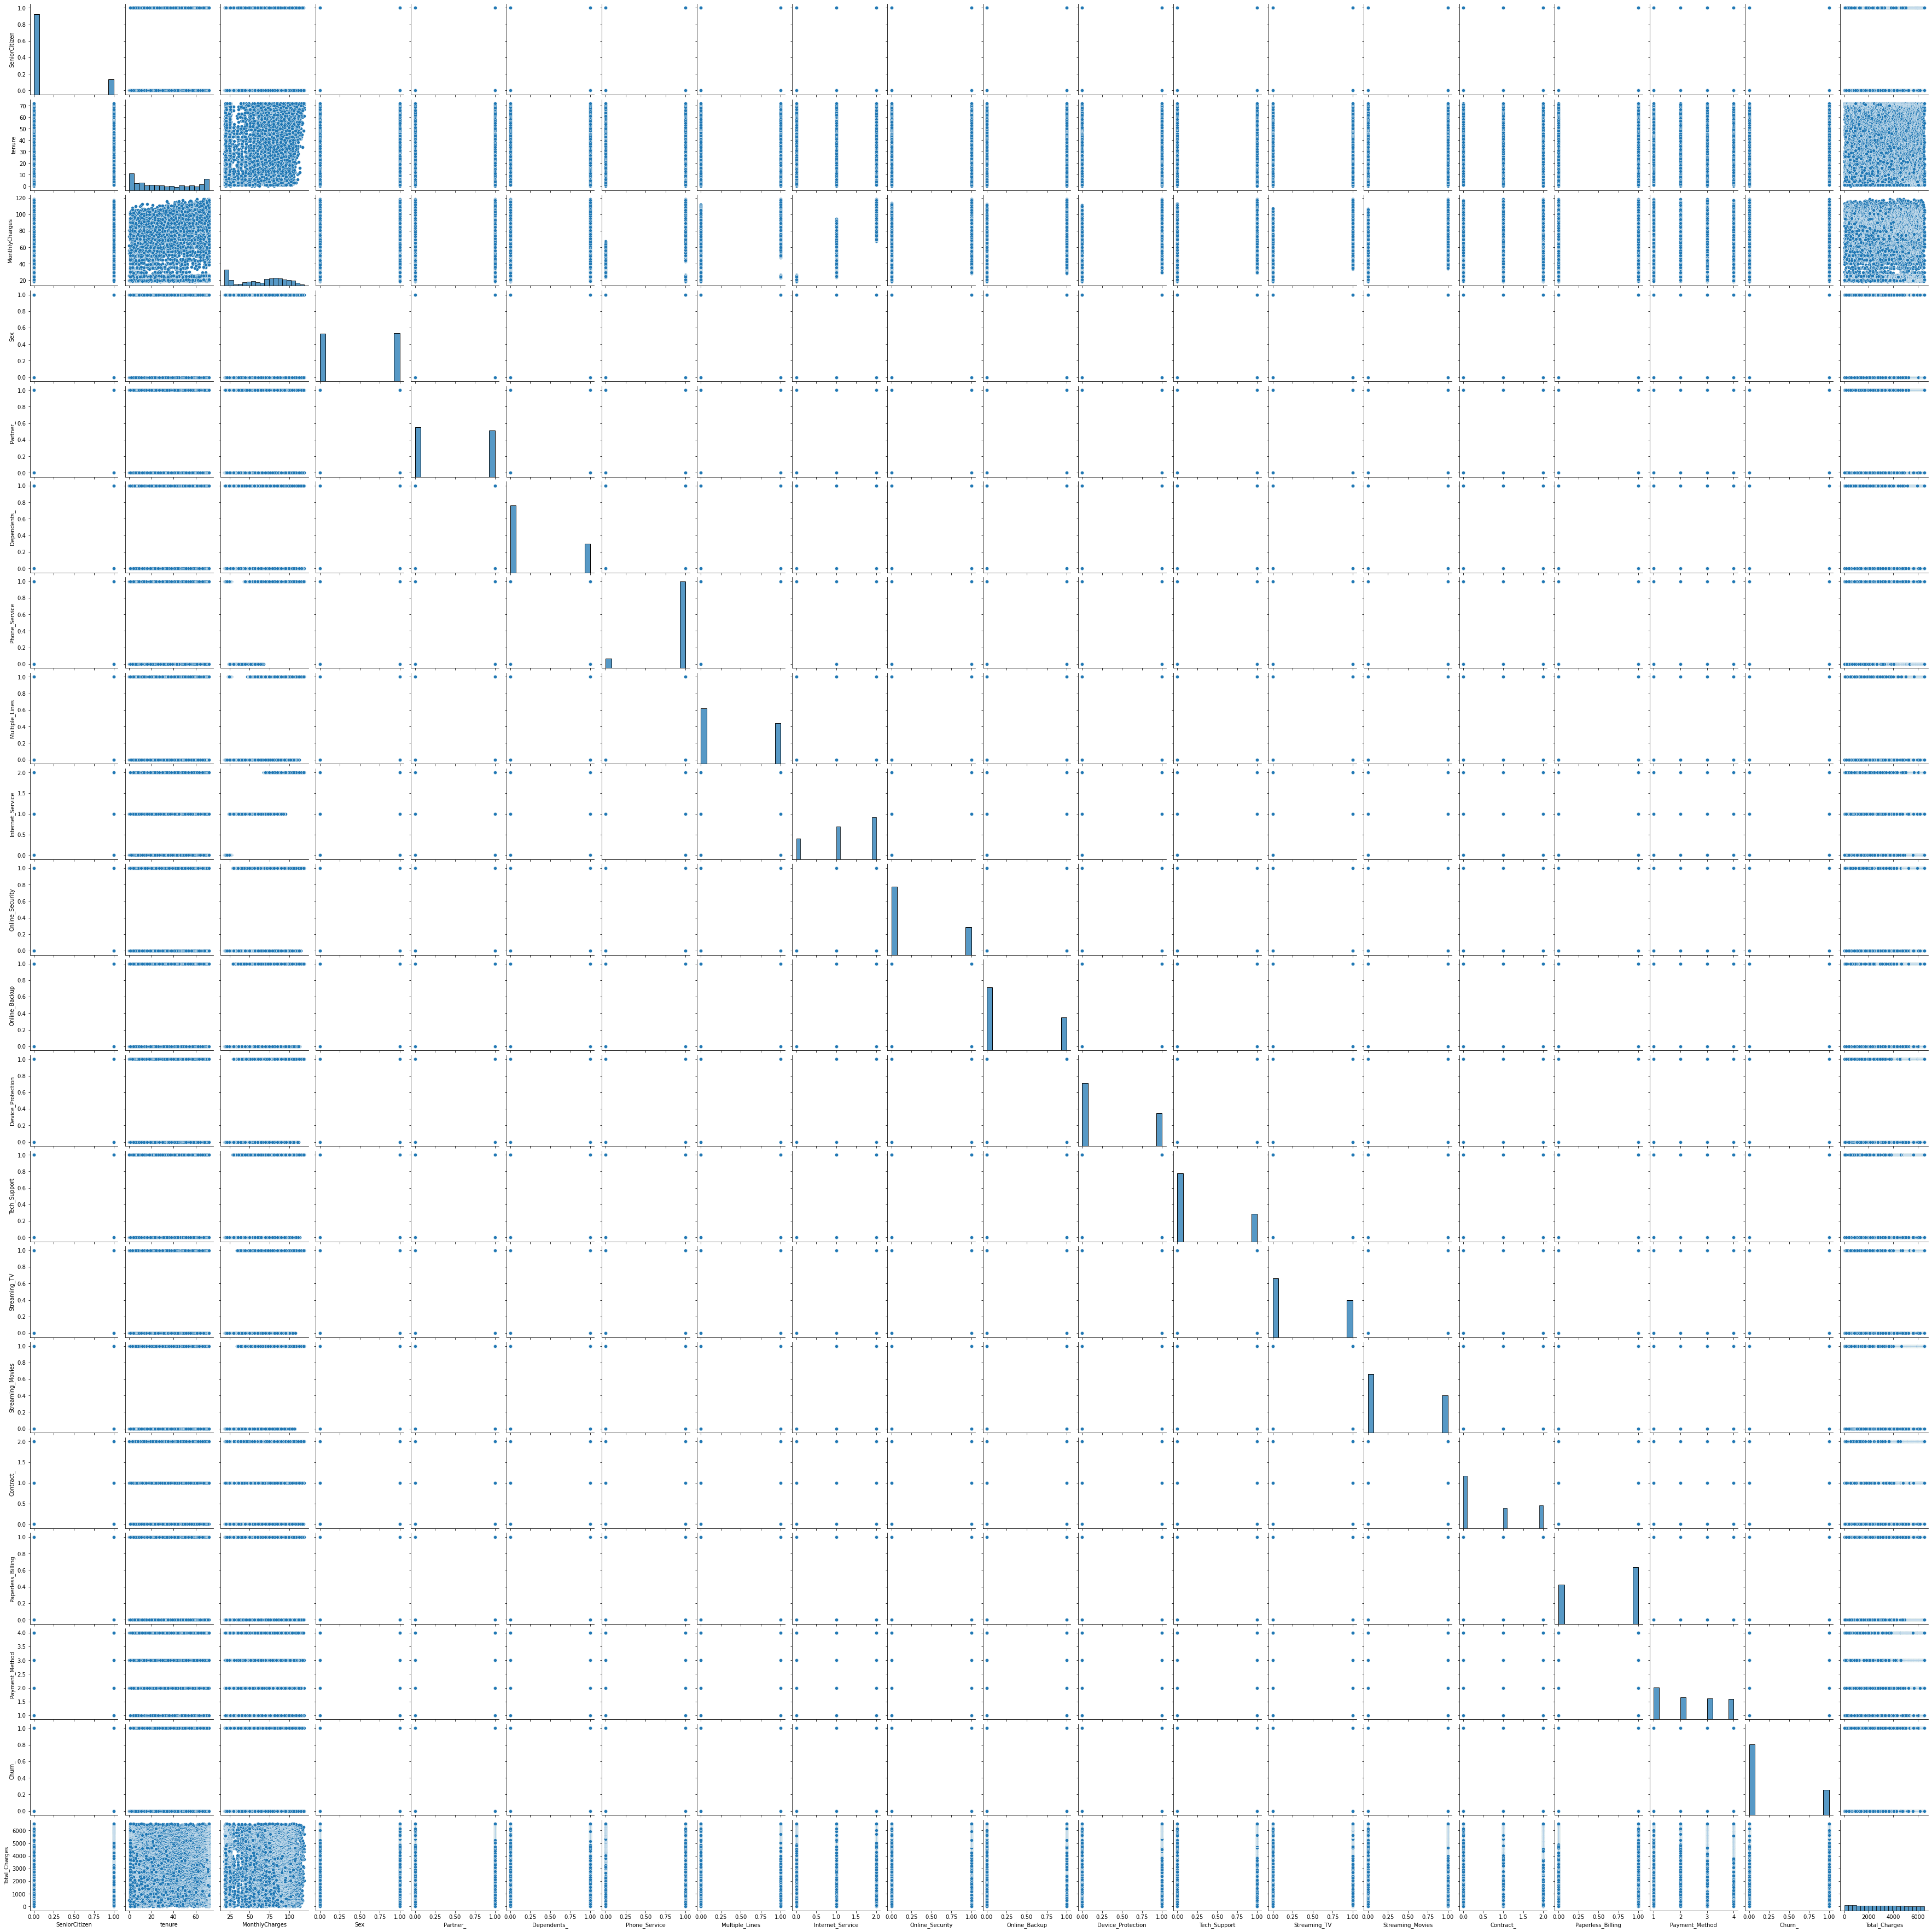

In [9]:
# Pairplot before Droping the attributes, to get the idea of non-relevent attributes

sns.pairplot(df2);

In [10]:
# Drop attribute/s if required using relevant functional

df2.drop(['TotalCharges','Tech_Support','Online_Backup','Device_Protection','Streaming_Movies','Paperless_Billing','Payment_Method'], axis = 1, inplace = True)
df2.head(1);

In [11]:
# Perform detailed statistical analysis on the data.

df2.describe();

## 3.Data analysis & visualisation: 
### • Perform detailed statistical analysis on the data.
### • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [12]:
sns.pairplot(df2)

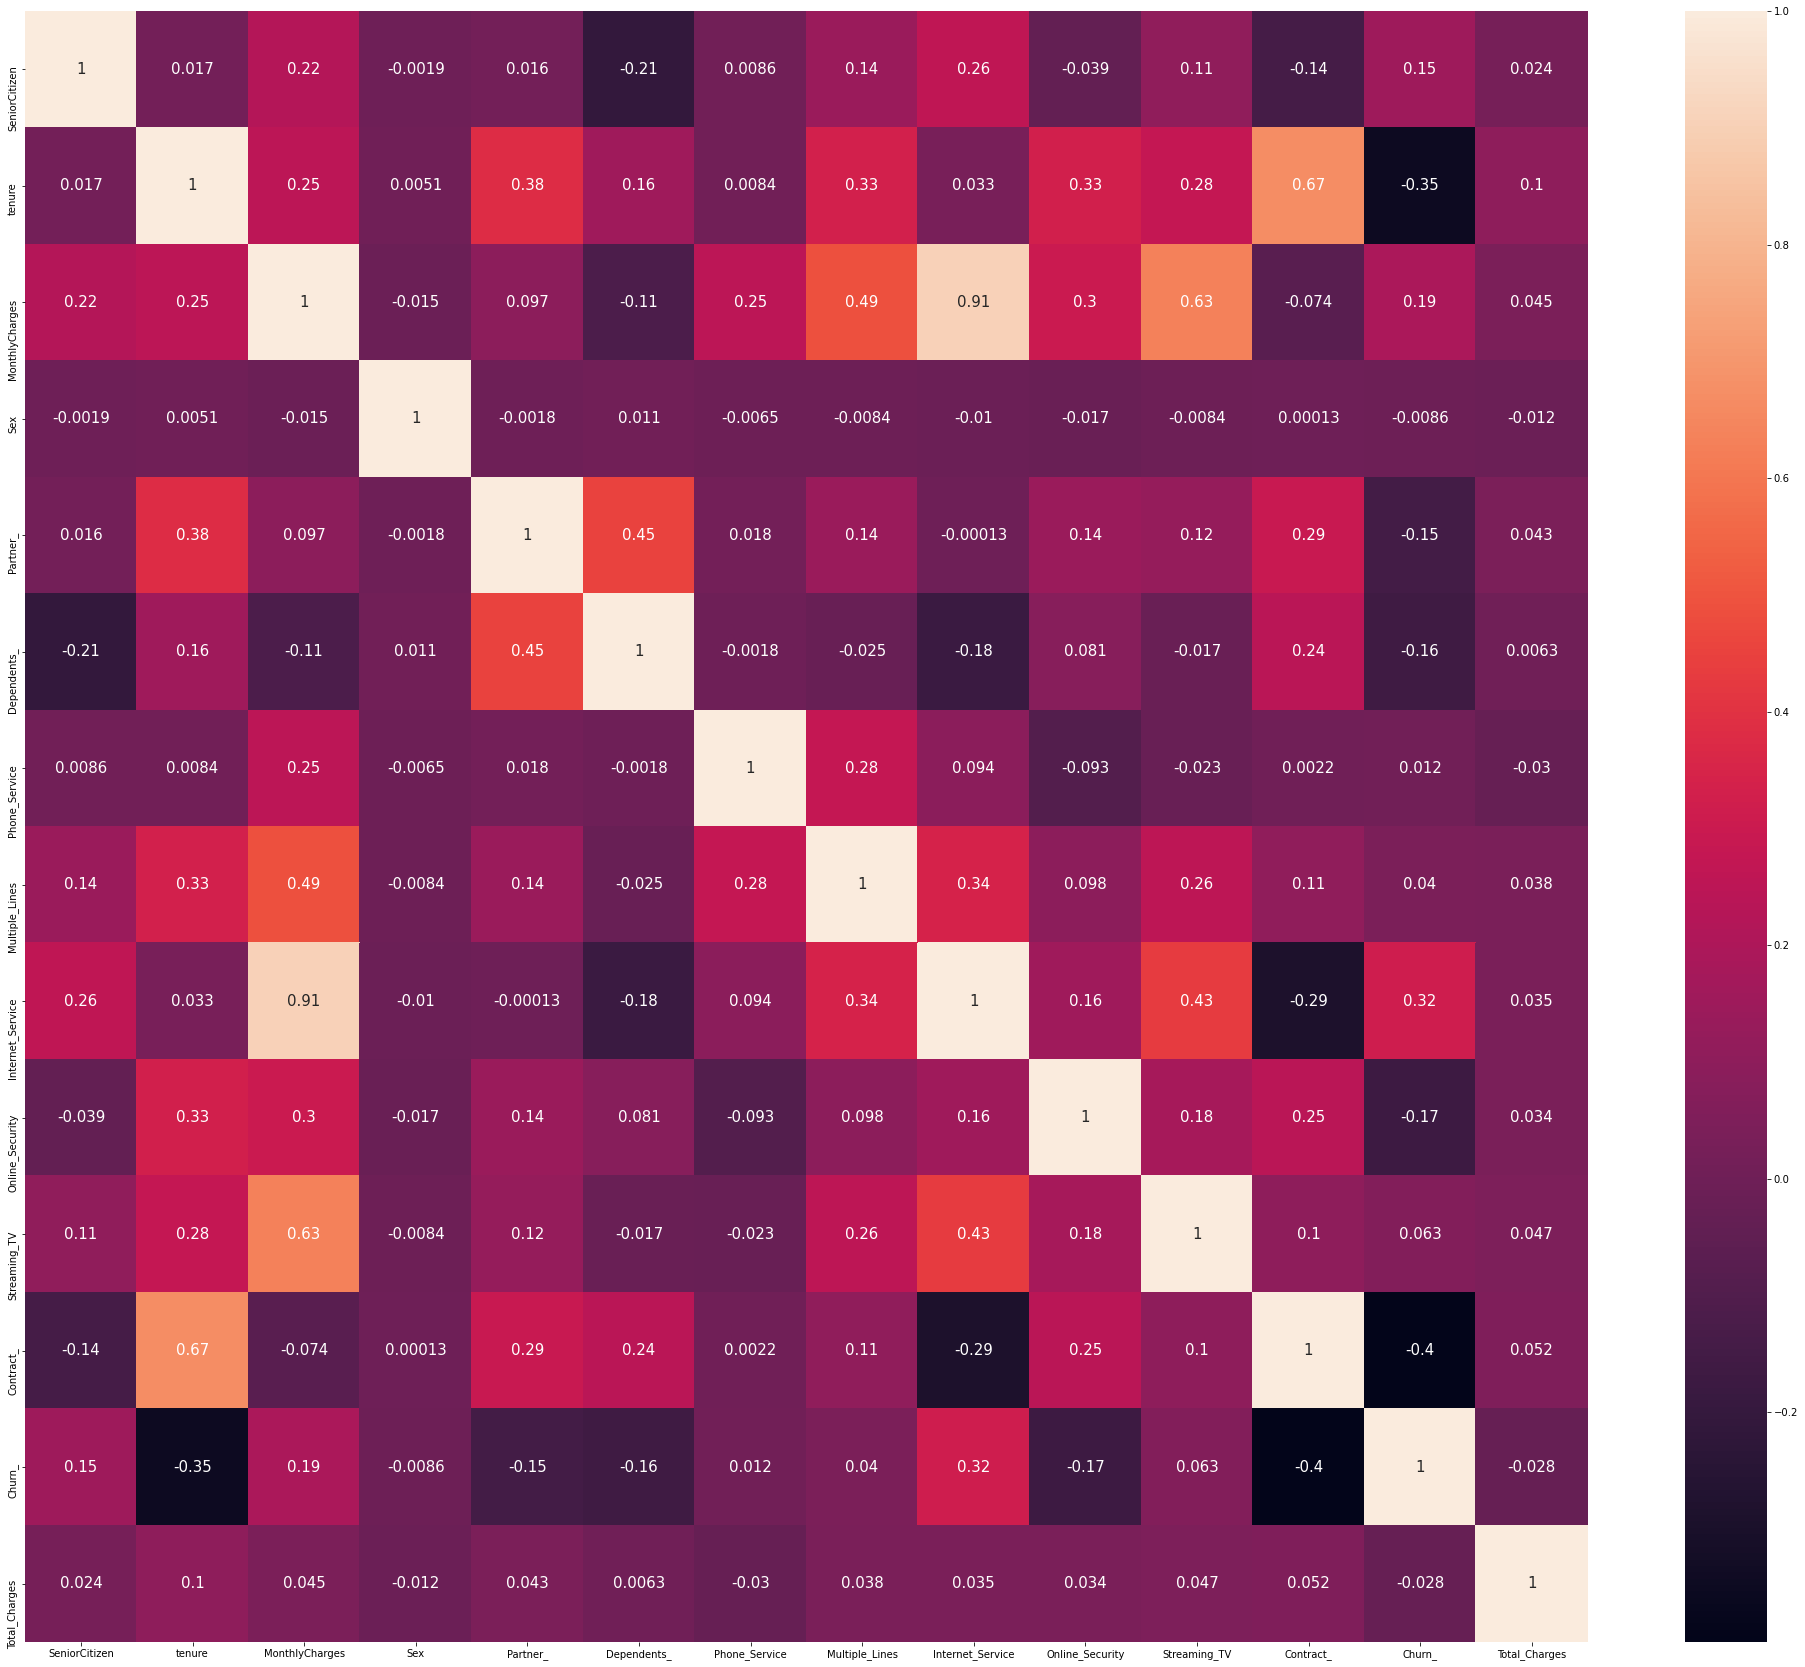

In [13]:
corr = df2.corr()
plt.subplots(figsize=(35,30))
sns.heatmap(corr, annot=True ,annot_kws={'size': 15});

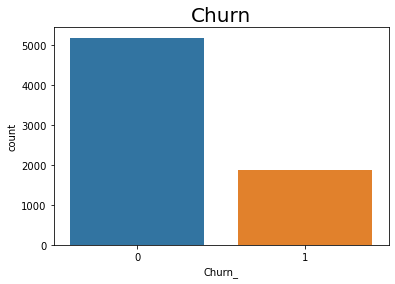

In [14]:
# Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

plt.title('Churn',size=20)
sns.countplot(x="Churn_", data=df2);

### Observations
- In the data more number of customer’s have left the services, this will give us the good insight 

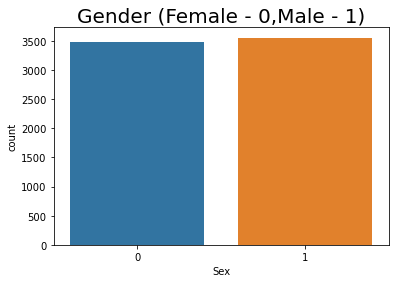

In [15]:
plt.title('Gender (Female - 0,Male - 1)',size=20)
sns.countplot(df2["Sex"]);

### Observations

- The distribution of gender both are equal, this may not be a good feature to predict. 

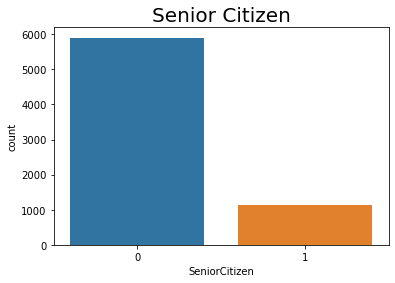

In [16]:
plt.title('Senior Citizen',size=20)
sns.countplot(df2["SeniorCitizen"]);

### Observations

- Lesser the young generation and greater the older generation, this may help in the prediction

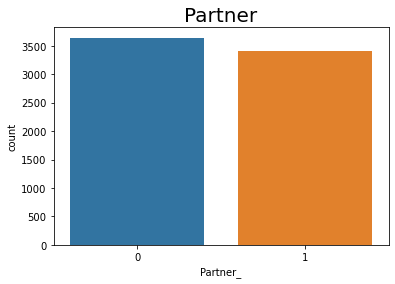

In [17]:
plt.title('Partner',size=20)
sns.countplot(df2["Partner_"]);

### Observations

- Equal distribution in the Partner, not a good feature to consider

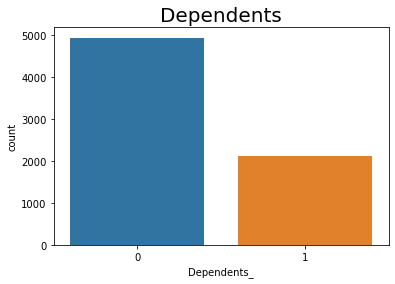

In [18]:
plt.title('Dependents',size=20)
sns.countplot(df2["Dependents_"]);

### Observations
 
- Customers who are more dependent tends to leave

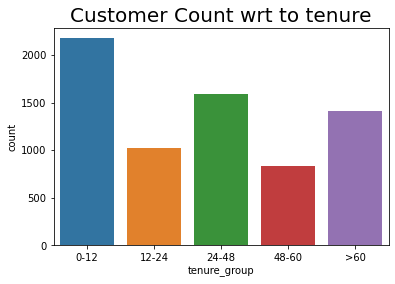

In [19]:
temp_df = df2.copy()
bins=[0,12,24,48,60,100]
temp_df['tenure_group']=pd.cut(temp_df['tenure'],bins,labels=['0-12','12-24','24-48','48-60','>60'])
plt.title('Customer Count wrt to tenure',size=20)
sns.countplot(temp_df['tenure_group']);

### Observations
- Since we have more churn, it is obvious that the customer have left the service within a year

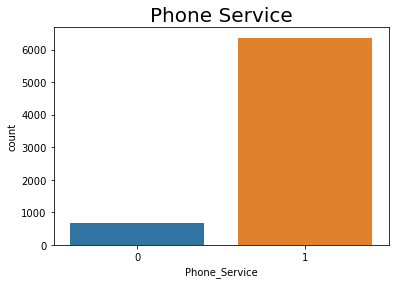

In [20]:
plt.title('Phone Service',size=20)
sns.countplot(df2["Phone_Service"]);

### Observations
- People will most likely to have phone service

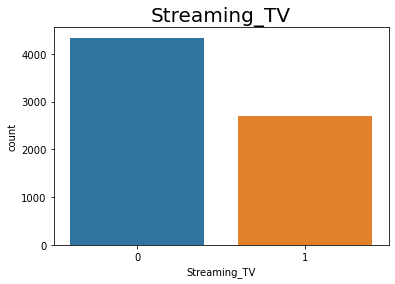

In [21]:
plt.title('Streaming_TV',size=20)
sns.countplot(df2["Streaming_TV"]);

### Observations
- Streaming TV or movies, Tech support as well as Device protection have similar relation, this factor have less effect on the reason to opt out of the service

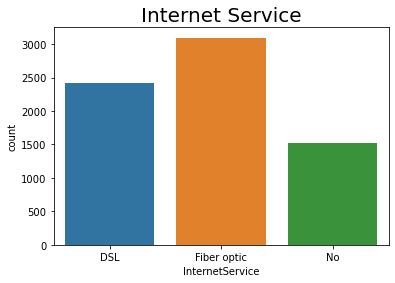

In [23]:
plt.title('Internet Service',size=20)
sns.countplot(df["InternetService"]);

### Observations
- Since there are large number of internet user, and mostly prefer to have Fiber Optic, this may be a good suggestion to the company to have Fiber Optic as Standard

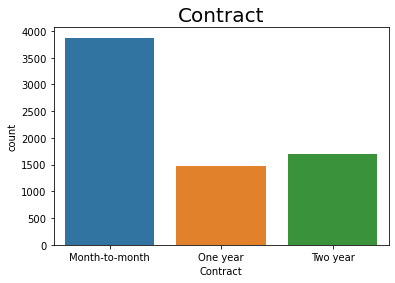

In [24]:
plt.title('Contract',size=20)
sns.countplot(df["Contract"]);

### Observations
-Most preferred contract is Month on month bases, this may be one of the reason, since we have larger number of Churn in the data.

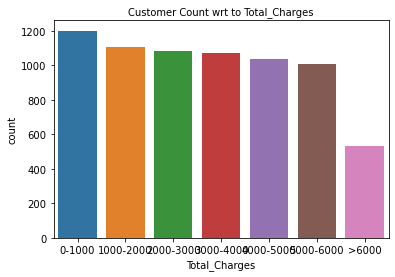

In [25]:
temp_df = df2.copy()
bins=[0,1000,2000,3000,4000,5000,6000,6530]
temp_df['Total_Charges']=pd.cut(temp_df['Total_Charges'],bins,labels=['0-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','>6000'])
plt.title('Customer Count wrt to Total_Charges',size=10,)
sns.countplot(temp_df['Total_Charges']);

### Observations
- Total Charges are clearly on the lower side.

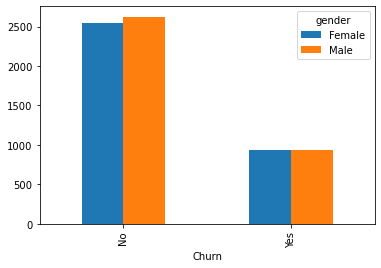

In [26]:
pd.crosstab(df['Churn'],df['gender']).plot(kind = 'bar');

### Observations
- In Comparison to the Gender, it is clear that this do not give a good insight.

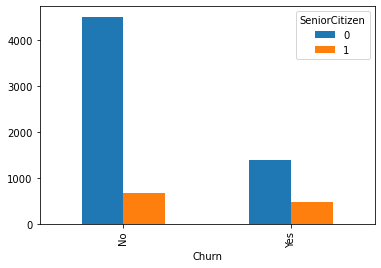

In [27]:
pd.crosstab(df['Churn'],df['SeniorCitizen']).plot(kind = 'bar');

### Observations
- In Comparison to the Senior citizen with churn, the dataset has the large number of senior generation as well as more number of churn data, this is corresponding to the fact that more number of senior are leaving and younger generation are equally staying as well as equally leaving with the company.

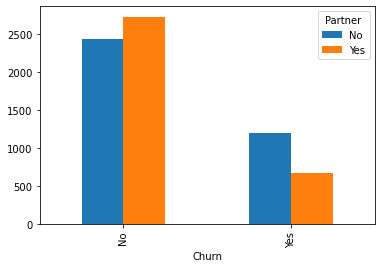

In [28]:
pd.crosstab(df['Churn'],df['Partner']).plot(kind = 'bar');

### Observations
- In Comparison to the Partners with churn, those customers who have the partner may opt out the services than who don’t have the partner

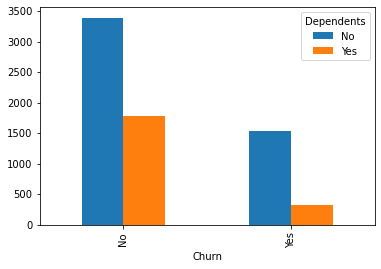

In [29]:
pd.crosstab(df['Churn'],df['Dependents']).plot(kind = 'bar');

### Observations
- In Comparison to the Dependents with churn, those customers who do not have the Dependent may opt out the services than who have the Dependent may stay.

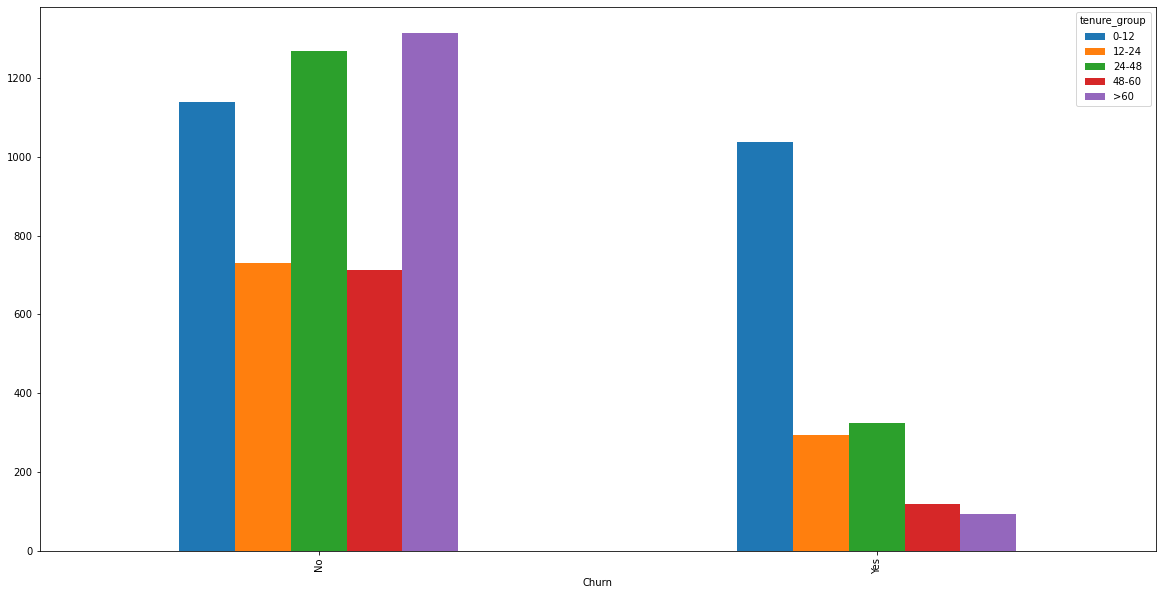

In [30]:
temp_df = df2.copy()
bins=[0,12,24,48,60,100]
temp_df['tenure_group']=pd.cut(temp_df['tenure'],bins,labels=['0-12','12-24','24-48','48-60','>60'])
pd.crosstab(df['Churn'],temp_df['tenure_group']).plot(figsize=(20, 10), kind = 'bar');

### Observations
- In Comparison of Tenure with churn, Customers with lesser tenure tend to leave the company

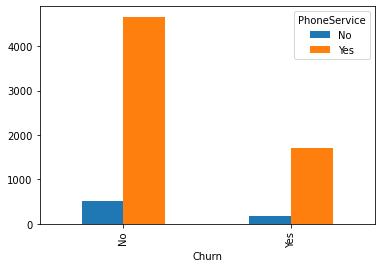

In [31]:
pd.crosstab(df['Churn'],df['PhoneService']).plot(kind = 'bar');

### Observations
- In Comparison of Phone Service with churn, the customer have equally left and retained the service.

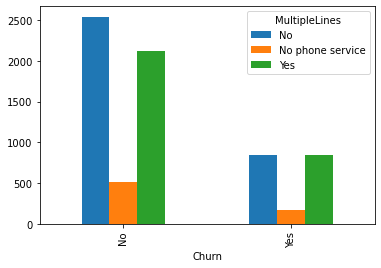

In [32]:
pd.crosstab(df['Churn'],df['MultipleLines']).plot(kind = 'bar');

### Observations
- In Comparison of Multiple Lines with churn, the graph is similar to the churn it does not give much insight.

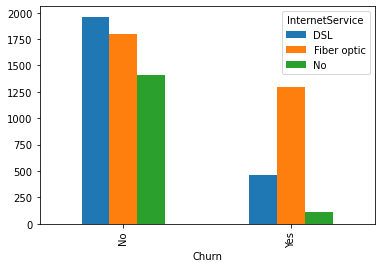

In [33]:
pd.crosstab(df['Churn'],df['InternetService']).plot(kind = 'bar');

### Observations
- In Comparison of Internet service with churn, the graph indicates that the customer with Fiber optic have less probability to leave the services

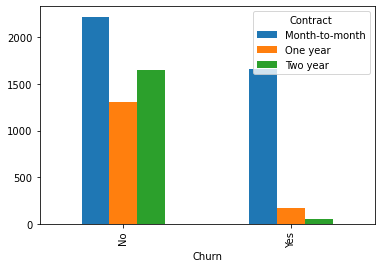

In [34]:
pd.crosstab(df['Churn'],df['Contract']).plot(kind = 'bar');

### Observations
- In Comparison of Contract with churn, contract with one or two year, the customer is most likely not to leave the services.

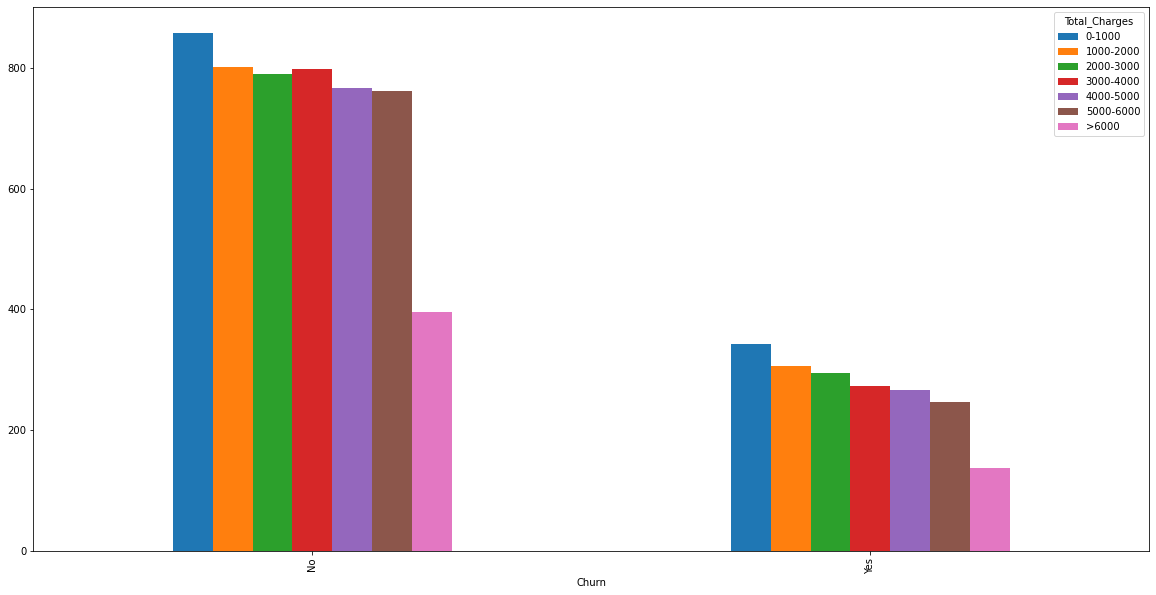

In [35]:
temp_df = df2.copy()
bins=[0,1000,2000,3000,4000,5000,6000,6530]
temp_df['Total_Charges']=pd.cut(temp_df['Total_Charges'],bins,labels=['0-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','>6000'])
pd.crosstab(df['Churn'],temp_df['Total_Charges']).plot(figsize=(20, 10), kind = 'bar');

### Observations
- In Comparison of Total Charges with churn, the customers with more charges which tells us that the customer have contract for the long term is likely to remain with the company

In [36]:
df2.head(5)

,SeniorCitizen,tenure,MonthlyCharges,Sex,Partner_,Dependents_,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Streaming_TV,Contract_,Churn_,Total_Charges
0,0,1,29.85,0,1,0,0,0,1,0,0,0,0,0
1,0,34,56.95,1,0,0,1,0,1,1,0,1,0,1
2,0,2,53.85,1,0,0,1,0,1,1,0,0,1,2
3,0,45,42.30,1,0,0,0,0,1,1,0,1,0,3
4,0,2,70.70,0,0,0,1,0,2,0,0,0,1,4


In [37]:
df2["Total_Charges"] = df2["Total_Charges"].astype(float)

In [38]:
df2

,SeniorCitizen,tenure,MonthlyCharges,Sex,Partner_,Dependents_,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Streaming_TV,Contract_,Churn_,Total_Charges
0,0,1,29.85,0,1,0,0,0,1,0,0,0,0,0.0
1,0,34,56.95,1,0,0,1,0,1,1,0,1,0,1.0
2,0,2,53.85,1,0,0,1,0,1,1,0,0,1,2.0
3,0,45,42.30,1,0,0,0,0,1,1,0,1,0,3.0
4,0,2,70.70,0,0,0,1,0,2,0,0,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,1,1,1,1,1,0,6526.0
7039,0,72,103.20,0,1,1,1,1,2,0,1,1,0,6527.0
7040,0,11,29.60,0,1,1,0,0,1,1,0,0,0,6528.0
7041,1,4,74.40,1,1,0,1,1,2,0,0,0,1,6529.0


## 4. Data pre-processing: [ Score: 5 point ]
### • Segregate predictors vs target attributes
### • Check for target balancing and fix it if found imbalanced.
### • Perform train-test split.
### • Check if the train and test data have similar statistical characteristics when compared with original data.

In [39]:
temp_df_1 = df2.copy()
X = temp_df_1.drop("Churn_", axis=1)
y = temp_df_1['Churn_']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1);

print("\nTraining set : \n", X_train.describe().transpose(), y_train.describe().transpose())
print("\Testing set : \n", X_test.describe().transpose(), y_test.describe().transpose())


Training set : 
                    count         mean          std    min      25%       50%  \
SeniorCitizen     5634.0     0.161874     0.368368   0.00     0.00     0.000   
tenure            5634.0    32.277955    24.555211   0.00     9.00    29.000   
MonthlyCharges    5634.0    64.779127    30.104993  18.25    35.40    70.375   
Sex               5634.0     0.503727     0.500030   0.00     0.00     1.000   
Partner_          5634.0     0.479588     0.499628   0.00     0.00     0.000   
Dependents_       5634.0     0.295705     0.456399   0.00     0.00     0.000   
Phone_Service     5634.0     0.902911     0.296105   0.00     1.00     1.000   
Multiple_Lines    5634.0     0.423678     0.494184   0.00     0.00     0.000   
Internet_Service  5634.0     1.223287     0.779088   0.00     1.00     1.000   
Online_Security   5634.0     0.286120     0.451986   0.00     0.00     0.000   
Streaming_TV      5634.0     0.384629     0.486551   0.00     0.00     0.000   
Contract_         5634

## 5. Model training, testing and tuning:
#### • Train and test all ensemble models taught in the learning module.
#### • Display the classification accuracies for train and test data.
#### • Apply all the possible tuning techniques to train the best model for the given data.
#### • Display and compare all the models designed with their train and test accuracies.
#### • Select the final best trained model along with your detailed comments for selecting this model.
#### • Pickle the selected model for future use.

#### Decision Tree Model

In [40]:
# Build Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


0.9955626553070642
0.730305180979418


In [41]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, random_state=1)
dTreeR.fit(X_train, y_train)

print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7300319488817891
0.7530163236337828


#### Ensemble RandomForest Classifier

0.7955997161107168


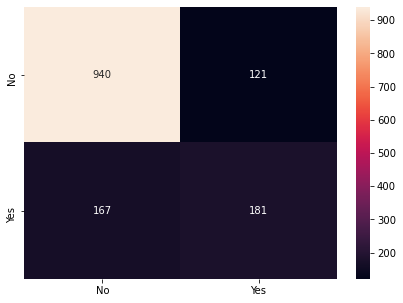

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 

rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

#### GradientBoost

0.8026969481902059


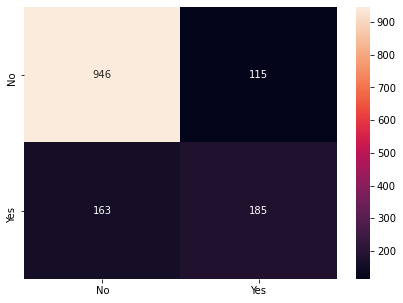

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

#### AdaBoosting

0.7863733144073811


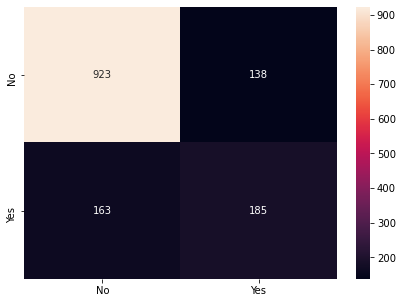

In [44]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)


abcl = abcl.fit(X_train, y_train)

y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

#### Ensemble Learning - Bagging

In [45]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.7920511000709723


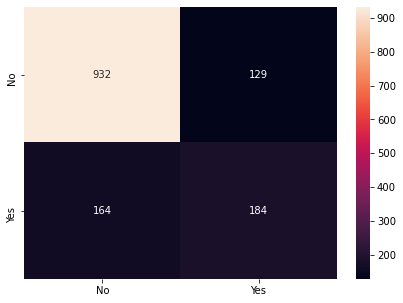

In [46]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [47]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(GradientBoostingClassifier)
 
# Load the pickled model
GradientBoostingClassifier_from_pickle = pickle.loads(saved_model)


## Conclusion and improvisation:
### Write your conclusion on the results.
#### Suggestion:
- Focus on younger generation
- Do not encourage partners.
- Make customer dependent on the services so that they may stay.
- The company should provide internet through Fiber optics.
- The company should focus on the long term contract instead of short term to retain the customers, best way to do it is by reducing the charges so that the customer takes long term contract.

### Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.

##### Quality of the data:

- The Dataset was larger with no major correction.
- Most of the features were utilized.

##### Quantity of the data:

- The data quality was enough for the need.
###### 3V’s of the data:
- Volume is acceptable as most of the data was utilized and not major changes were done.
- In terms of Velocity and Variety of the data, we cannot suggest much as the data is not generate in real-time nor it was unstructured or were Human or Machine generated data.

##### Few more suggestion on data collection.

- Have more data on the customer who have not left the company
- The data set had more of the biased on Churn, due to this we will only know why customer opt out. Yes it gives the company to improve the services. But if we knew why the customers are with the company it would help in advertisement, which could even bring on new customer on their platform.
